In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from sympy.abc import w, x, y, z, v
from tabulate import tabulate
from boon import *
from boon.logic import *

# The program illustrates the basic features of BooN

# Define the initial Boolean network
boon = BooN({x: y, y: x & z, z: w | ~x & v | y, w: x & y | ~x & z & ~w & ~v, v: ~v & w})

In [3]:
# Get the variables
print("Variables of BooN: ", boon.variables)

Variables of BooN:  {z, x, w, y, v}


In [4]:
# Show BooN with different styles.
print("- SHOW NETWORK -")
print("Logical")
print(boon)

- SHOW NETWORK -
Logical
z = w ∨ y ∨ (v ∧ ¬x)
x = y
w = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬w ∧ ¬x)
y = x ∧ z
v = w ∧ ¬v


In [5]:
print("Sympy")
boon.style = SYMPY
print(boon)

Sympy
z = w | y | (v & ~x)
x = y
w = (x & y) | (z & ~v & ~w & ~x)
y = x & z
v = w & ~v


In [6]:
print("Mathematica")
boon.style = MATHEMATICA
print(boon)

Mathematica
z = w || y || (v && !x)
x = y
w = (x && y) || (z && !v && !w && !x)
y = x && z
v = w && !v


In [7]:
# Default style is LOGICAL
boon.style = LOGICAL

In [8]:
print("- DELETE v -")
boon.delete(v)
print(boon)

- DELETE v -
w = (x ∧ y) ∨ (z ∧ ¬w ∧ ¬x)
z = w ∨ y ∨ ¬x
y = x ∧ z
x = y


In [9]:
print("- RENAME w to v -")
boon.rename(w, v)
print(boon)

- RENAME w to v -
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
z = v ∨ y ∨ ¬x
y = x ∧ z
x = y


In [10]:
# compute the stable states
print("- STABLE STATES -")
stable = boon.stable_states
print(tabulate(stable, headers='keys', tablefmt='dpsl'))

print("\nStability constraints in logic:", prettyform(boon.stability_constraints()))

- STABLE STATES -
z     v     y     x
----  ----  ----  ----
True  True  True  True

Stability constraints in logic: (x ⇔ y) ∧ (y ⇔ (x ∧ z)) ∧ (z ⇔ (v ∨ y ∨ ¬x)) ∧ (v ⇔ ((x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)))


- MODEL ASYNCHRONOUS-


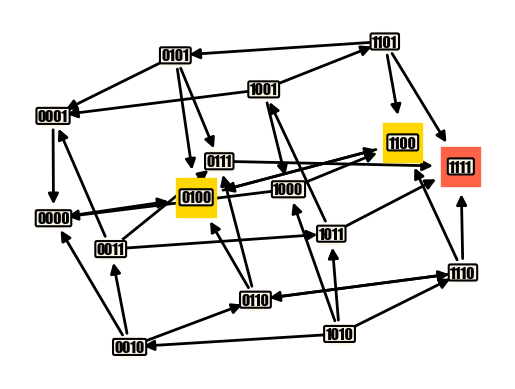

In [11]:
# initialize figures
_, ax2 = plt.subplots()
# Define the datamodel of dynamics
print("- MODEL ASYNCHRONOUS-")
M = boon.model()
ax2.axis('off')
boon.draw_model(M, pos=hypercube_layout(4), ax=ax2)

- MODEL SYNCHRONOUS-


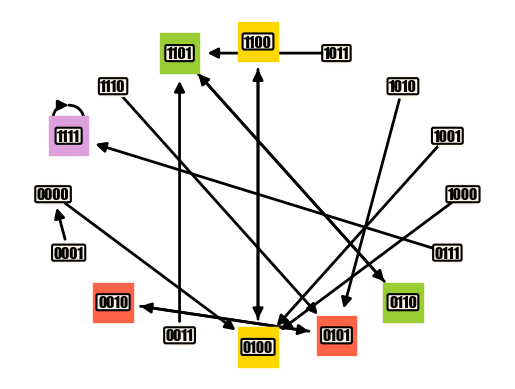

In [12]:
# Synchronous datamodel
print("- MODEL SYNCHRONOUS-")
MS = boon.model(mode=synchronous, self_loop=True)
_, ax3 = plt.subplots()
ax3.axis('off')
boon.draw_model(MS, pos=nx.shell_layout(MS), ax=ax3)

In [13]:
print("- EQUILIBRIA -")
eqs = boon.equilibria(model=MS)
for eq in eqs:
    print(tabulate(eq, headers='keys'))

- EQUILIBRIA -
v      z     y      x
-----  ----  -----  -----
False  True  False  False
True   True  False  False
v      z      y      x
-----  -----  -----  -----
False  False  True   False
False  True   False  True
v      z     y      x
-----  ----  -----  -----
True   True  False  True
False  True  True   False
v     z     y     x
----  ----  ----  ----
True  True  True  True


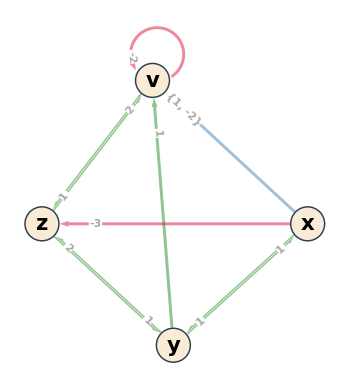

In [14]:
# Build the interaction graph
IG = boon.interaction_graph

boon.pos = nx.circular_layout(IG)
_, ax1 = plt.subplots()
ax1.axis('off')
boon.draw_IG(IG, modular=True, ax=ax1)

In [15]:
# retrieve BooN from the interaction graph
print("- FROM INTERACTION GRAPH -")
boon.from_ig(IG)
print(boon)

- FROM INTERACTION GRAPH -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


In [16]:
# save and re-load in a new BooN boon2
print("SAVE and LOAD")
boon.save("bn")
boon2 = BooN()
boon2.load("bn")  # load is a static method of BooN
print(boon2)

SAVE and LOAD
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


In [17]:
print("- CNF Conversion -")
boon2.cnf()
print(boon2)

- CNF Conversion -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∨ z) ∧ (x ∨ ¬v) ∧ (y ∨ ¬x)
x = y


In [18]:
print(" - DNF conversion -")
boon2.dnf()
print(boon2)

 - DNF conversion -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y


In [19]:
# exportation and import from  text file
print("- EXPORT & IMPORT -")
boon2.to_textfile('boolnet')
boon2.from_textfile('boolnet.txt')  
print(boon2)

- EXPORT & IMPORT -
z = v ∨ y ∨ ¬x
y = x ∧ z
v = (x ∧ y) ∨ (z ∧ ¬v ∧ ¬x)
x = y
